In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data_lr.csv')

In [3]:
df.shape

(200, 4)

### Multicollinearity

In [4]:
df.columns

Index(['X1', 'X2', 'X3', 'y'], dtype='object')

In [5]:
X = df.iloc[:,:3]
y= df.iloc[:,-1]

In [6]:
X.head()

X1        X2        X3
0 -0.570563  1.420342  0.495580
1 -0.990563  0.556965  1.045064
2 -0.674728  0.150617  1.774645
3  0.388250 -0.387127 -0.110229
4  1.167882 -0.024104  0.145063

In [7]:
y.head()

0    -9.763182
1   -24.029355
2    45.616421
3    34.135737
4    86.663647
Name: y, dtype: float64

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [9]:
X_train.shape

(140, 3)

In [10]:
X_train.head()

X1        X2        X3
116  0.881301  0.556443 -0.924294
67   1.500890 -0.870159 -0.006299
78   1.486148  0.236716 -0.205650
42   0.743637  0.136132  0.141811
17  -1.473943  2.019651 -0.028786

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [12]:
vif = []
for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train,i))

In [13]:
type(vif)

list

In [14]:
pd.DataFrame({'vif':vif}, index=df.columns[0:3]).T

X1        X2       X3
vif  1.010326  1.009871  1.01395

In [15]:
#since the vif score is not greater than 5, there is no multicollinearity

In [16]:
#to confirm the above visually

In [17]:
sns.heatmap(df.iloc[:,0:3].corr(),annot=True)

<Axes: >

<Axes: >

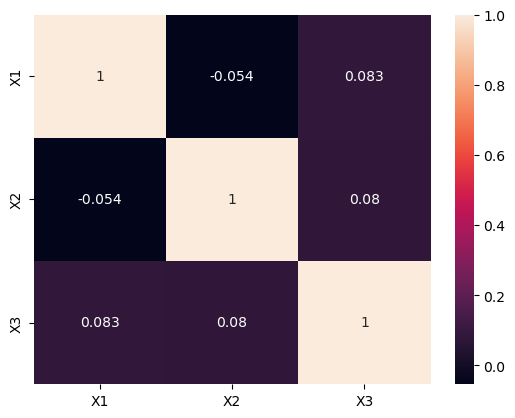

In [18]:
sns.heatmap(X_train.corr(), annot = True)

### Linear Relationship

In [21]:
plt.scatter(df['X1'], df['y'])

In [22]:
#X1  varies linearly with the label column

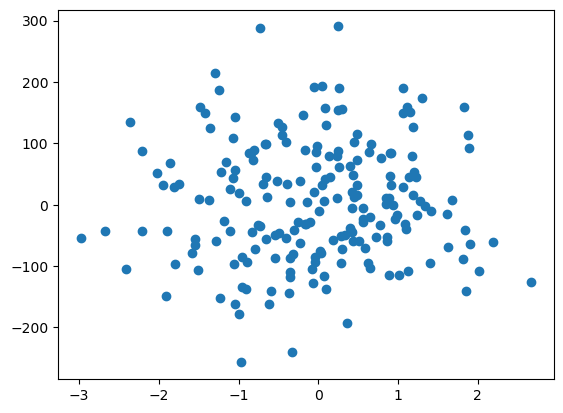

In [23]:
plt.scatter(df['X2'],df['y'])

In [ ]:
#X2 is not linearly related tothe label target

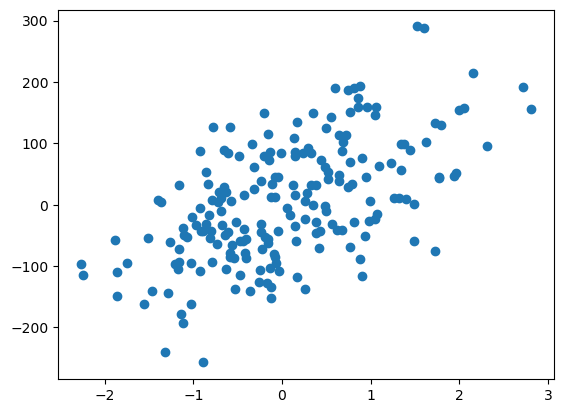

In [24]:
plt.scatter(df['X3'], df['y'])

In [24]:
#some of the values in X3 are linearly related to the label target

In [25]:
import statsmodels.api as sm

In [26]:
OLS_model = sm.OLS(y_train, X_train).fit()

In [27]:
pred = sm.OLS(y_train, X_train).fit().predict(X_test)

In [28]:
sm.OLS(y_train, X_train).fit().condition_number

1.1316630887306267

In [29]:
np.array(X_train)

array([[ 8.81301133e-01,  5.56442945e-01, -9.24293742e-01],
       [ 1.50089036e+00, -8.70159190e-01, -6.29877900e-03],
       [ 1.48614836e+00,  2.36716267e-01, -2.05649899e-01],
       [ 7.43636971e-01,  1.36132230e-01,  1.41810517e-01],
       [-1.47394283e+00,  2.01965064e+00, -2.87856460e-02],
       [-8.89888979e-01, -1.58094538e+00, -4.22792727e-01],
       [ 2.42978576e-01,  3.98257627e-01, -1.11441271e+00],
       [ 2.31400761e-01,  1.19280517e+00, -4.32576376e-01],
       [ 5.97904850e-02,  3.32237465e-01, -1.10055231e+00],
       [ 3.13060374e-01, -5.16647925e-01,  6.45061985e-01],
       [ 1.00253584e+00,  1.17822210e+00, -4.89006042e-01],
       [ 2.08964887e+00, -7.33069934e-01,  1.59823525e+00],
       [-4.26585979e-01, -7.82767490e-02, -1.16927580e+00],
       [ 5.01539683e-01, -8.06698514e-01,  1.44349177e+00],
       [ 1.35940375e-01,  9.89572796e-01, -8.19833406e-01],
       [-2.28179232e+00, -3.29578153e-01, -1.32448870e+00],
       [-6.89599657e-01, -3.57440729e-01

In [30]:
#A condition number between 10 and 30 indicates the presence of multicollinearity.
#Since the condition number we have achieved is less than 10, we infer taht there is no multicollinearity.

In [31]:
np.linalg.cond(np.array(X_train))

1.1316630887306267

In [32]:
pred

58     -35.124395
40     190.322526
34      13.666439
102    -16.736117
184    117.770385
198   -108.108745
95     -40.566316
4       92.685065
29      -7.699588
168     28.105378
171     14.878323
18    -107.789305
11      64.122004
89     142.884207
110    -21.291844
118    137.426415
159    -51.035098
35     167.851556
136     60.477479
59     179.090655
51      32.296259
16      20.764105
44      69.226143
94     -13.388757
31      -2.223983
162   -106.615316
38     178.771192
28    -121.271088
193    -31.862585
27     133.992179
47     106.726259
165    -10.884200
194      6.567205
177     52.698456
176     27.215208
97     -47.413571
174     13.324537
73     102.520683
69     -51.200658
172     79.784418
108    171.336874
107    -22.267102
189   -124.543329
14     -64.894338
56    -106.652056
19     -99.773890
114    -52.119843
39     107.780882
185   -156.627504
124    160.591292
98     -58.522212
123    -58.658937
119     24.710521
53      24.448982
33      85.975173
179     14

In [33]:
residual = y_test - pred

In [34]:
residual

58     32.663629
40      0.817874
34    -30.952289
102    22.445720
184   -19.077047
198    14.872962
95    -12.701090
4      -6.021418
29     39.550868
168   -28.920280
171     5.135544
18    -19.243397
11     -2.624926
89    -10.040758
110   -20.940180
118    11.926019
159     8.935068
35    -17.649860
136    -4.609500
59     35.956101
51     20.493559
16     12.611493
44    -25.994545
94    -45.605885
31      3.713667
162   -11.173905
38     11.362802
28      6.651113
193   -12.410997
27      9.086844
47    -13.818922
165    16.227281
194     8.827773
177    20.627286
176   -19.793533
97     15.225289
174    -3.267853
73     24.738106
69    -18.589210
172     5.277930
108    22.878283
107   -37.402838
189   -28.089896
14    -40.715072
56     11.545981
19      2.451447
114   -12.578133
39     19.009096
185   -22.150319
124    12.820851
98     -1.894133
123     7.999558
119    20.367713
53      7.434691
33      1.151645
179    33.945545
181   -22.762953
106    21.270857
199    -2.4065

### Normal for Statsmodel

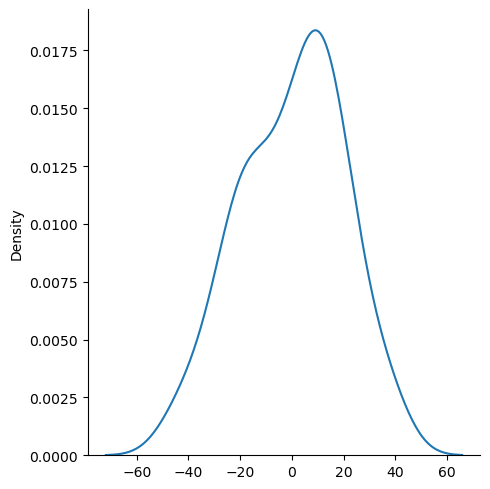

In [35]:
sns.displot(residual, kind = 'kde')

In [36]:
#The assumption states that when we plot the residuals they have to be normally distributed, and the above plot is a normal distribution one

### Homoscedasticity for statsmodel

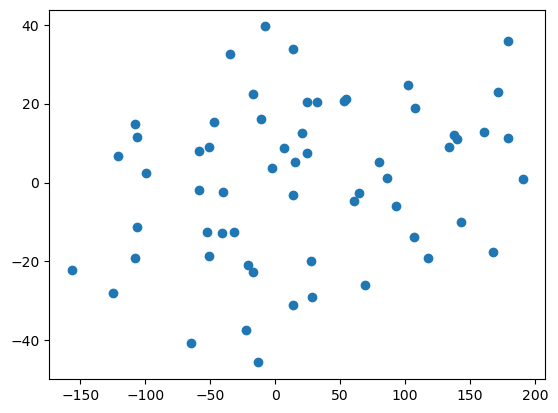

In [37]:
plt.scatter(pred, residual)

In [38]:
#since the residual spread is uniform, we conclude that homoscedasticity exists

### Autocorrelation of Residuals

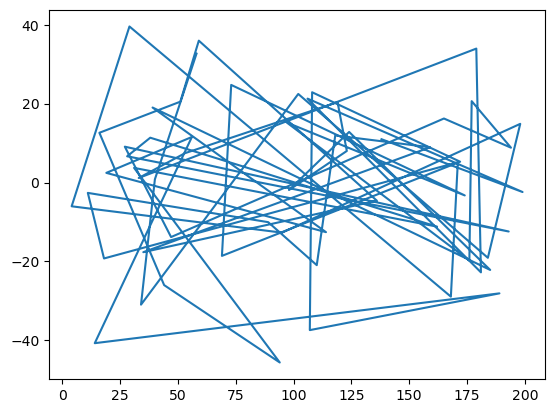

In [39]:
plt.plot(residual)

In [40]:
#No autocorrelation exists

In [41]:
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                              1128.
Date:                Wed, 08 Nov 2023   Prob (F-statistic):                    2.40e-96
Time:                        20:57:02   Log-Likelihood:                         -611.86
No. Observations:                 140   AIC:                                      1230.
Df Residuals:                     137   BIC:                                      1239.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X1            72.7295      1.603     45.383      0.000      69.561      75.898
X2            -0.2900      1.637     -0.177      0.860      -3.528       2.948
X3            53.3462      1.650     32.326      0.000      50.083      56.610
==============================================================================
Omnibus:                        6.210   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                6.886
Skew:                           0.314   Prob(JB):                       0.0320
Kurtosis:                       3.887   Cond. No.                         1.13
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
#formula = (72.7295*feature1)+(-0.2900*feature2)+(53.3462*feature3)
#R_sq In other words, 96% of the dependent variables (y-values) are explained by the independent variables (x-values)
#Standard error (SE) is a measure of how accurate a sample mean is compared to the true population mean

In [43]:
sm.OLS(y_train, X_train).fit().condition_number

1.1316630887306267

In [44]:
#The condition number is a measure of how sensitive a problem's solution is to small changes in the input data
#since the condition number is 1.1316630887296657 we can infer that there is no multicollinearity

### Hypothesis Test

### F-test

F-statistic: 1128.

### Durbin-Watson

### Jarque-Bera (JB)

H0: distribution is normal
H1: distribution is not normal

### Goldfeld Quandt Test

In [45]:
sm.stats.diagnostic.het_goldfeldquandt(y,X, drop=0.2)

(1.3191298899638708, 0.12847881750144802, 'increasing')